In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from collections import namedtuple
import warnings
import matplotlib as mpl
import numpy as np

In [ ]:
mpl.rcParams["figure.figsize"] = (12,6)

# Consumo Cerveja - São Paulo

Os dados (amostra) foram coletados em São Paulo, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos (média).

O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo um Alvo, durante o período de um ano.

Atributos:

    - Data: Dia da Coleta
    - Temperatura Media (C): Temperatura Média do Dia em Celsius
    - Temperatura Minima (C): Temperatura Mínima do Dia em Celsius
    - Temperatura Maxima (C): Temperatura Máxima do Dia em Celsius
    - Precipitacao (mm): Precipitação do Dia em Milímetros
    - Final de Semana: Identificação se é fim de semana ou não
    - Consumo de cerveja (litros): Quantidade de cerveja em livros


Fonte: https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

## Carregamento de Dados

In [ ]:
df = pd.read_csv('data/consumo_cerveja.csv')

In [ ]:
df.head()

## Limpeza Dados

Objetivo: Tratar os dados de forma que consigamos usá-los para algoritmo de ML

Possíveis técnicas:
 - Remoção de Dados Inválidos
 - Remoção de Outliers (Valores muito fora do esperado para o conjunto. Normalmente são erros de coleta)
 - Imputação de Valores em Campos Nulos
 - Transformação de tipos de variáveis

### Visualização Básica

#### Quantidade de Linhas e Colunas

In [ ]:
linhas, colunas = df.shape

print("O Dataset possui {} linhas e {} colunas".format(linhas, colunas))

#### Informações Básicas

Aqui é possivel visualizar as colunas, os tipos de dados, e se o dataset possui valores nulos

In [ ]:
df.info()

### Renomear Colunas

Para fins de facilidade de uso, deixamos tudo em _snake_case_, padrão do Python

In [ ]:
# Colunas Existentes
df.columns

In [ ]:
df = df.rename(columns={
    "Data": "data",
    "Temperatura Media (C)": "temperatura_media_c",
    "Temperatura Minima (C)": "temperatura_minima_c",
    "Temperatura Maxima (C)": "temperatura_maxima_c",
    "Precipitacao (mm)": "precipitacacao_mm",
    "Final de Semana": "final_de_semana",
    "Consumo de cerveja (litros)": "consumo_cerveja_litros",
})

In [ ]:
# Colunas Renomeadas
df.columns

In [ ]:
df.head()

### Tratar Dados Nulos

#### Inspecionar Dados Nulos

In [ ]:
# Mostrar dados Nulos
df[df.isna().any(axis=1)]

#### Remover dados nulos

In [ ]:
# Remover dados nulos
df = df[df.notna().any(axis=1)]

In [ ]:
# Mostrar dados nulos
df[df.isna().any(axis=1)]

#### Informações Básicas do Dataset após a Remoção de Dados Nulos

In [ ]:
df.info()

### Tratar Tipos de Variáveis

#### Mostrar tipos existentes

In [ ]:
df.dtypes

In [ ]:
df.sample(5)

#### Converter Strings para Float

In [ ]:
def substituir_virgula_por_ponto(x):
    return x.replace(',', '.')

df['temperatura_media_c'] = df['temperatura_media_c'].apply(substituir_virgula_por_ponto)
df['temperatura_minima_c'] = df['temperatura_minima_c'].apply(substituir_virgula_por_ponto)
df['temperatura_maxima_c'] = df['temperatura_maxima_c'].apply(substituir_virgula_por_ponto)
df['precipitacacao_mm'] = df['precipitacacao_mm'].apply(substituir_virgula_por_ponto)

df['temperatura_media_c'] = df['temperatura_media_c'].astype(float)
df['temperatura_minima_c'] = df['temperatura_minima_c'].astype(float)
df['temperatura_maxima_c'] = df['temperatura_maxima_c'].astype(float)
df['precipitacacao_mm'] = df['precipitacacao_mm'].astype(float)

In [ ]:
df.dtypes

In [ ]:
df.sample(5)

## Visualização de Varáveis

### Temperatura Média

#### Estatística Descritiva

In [ ]:
df["temperatura_media_c"].describe()

#### Histograma

In [ ]:
ax = sns.histplot(data=df, x="temperatura_media_c", kde=True, bins=20, color="green")

ax.set_title("Histograma de Temperatura Média")

#### Temperatura Média Ambiente vs Consumo de Cerveja

In [ ]:
ax = sns.regplot(data=df, x='temperatura_media_c', y='consumo_cerveja_litros', color="green")

ax.set_title("Temperatura Média Ambiente vs Consumo de Cerveja")

### Temperatura Mínima

#### Estatística Descritiva

In [ ]:
df["temperatura_minima_c"].describe()

#### Histograma

In [ ]:
ax = sns.histplot(data=df, x="temperatura_minima_c", kde=True, bins=20, color="blue")

ax.set_title("Histograma de Temperatura Mínima")

#### Temperatura Média Ambiente vs Consumo de Cerveja

In [ ]:
ax = sns.regplot(data=df, x='temperatura_minima_c', y='consumo_cerveja_litros', color="blue")

ax.set_title("Temperatura Mínima Ambiente vs Consumo de Cerveja")

### Temperatura Máxima

#### Estatística Descritiva

In [ ]:
df["temperatura_maxima_c"].describe()

#### Histograma

In [ ]:
ax = sns.histplot(data=df, x="temperatura_maxima_c", kde=True, bins=20, color="red")

ax.set_title("Histograma de Temperatura Máxima")

#### Temperatura Máxima Ambiente vs Consumo de Cerveja

In [ ]:
ax = sns.regplot(data=df, x='temperatura_maxima_c', y='consumo_cerveja_litros', color="red")

ax.set_title("Temperatura Máxima Ambiente vs Consumo de Cerveja")

### Precipitação

#### Estatística Descritiva

In [ ]:
df["precipitacacao_mm"].describe()

#### Histograma

In [ ]:
ax = sns.histplot(data=df, x="precipitacacao_mm", kde=True, bins=5, color="#0bc")

ax.set_title("Histograma de Precipitação")

#### Precipitação vs Consumo de Cerveja

In [ ]:
ax = sns.regplot(data=df, x='precipitacacao_mm', y='consumo_cerveja_litros', color="#0bc")

ax.set_title("Precipitação (mm) vs Consumo de Cerveja")

### Fim de Semana

#### Estatística Descritiva

In [ ]:
df["final_de_semana"].describe()

#### Fim de Semana vs Consumo de Cerveja

In [ ]:
g = sns.catplot(data=df, x='final_de_semana', y='consumo_cerveja_litros', color="#0bc")

axes = g.axes.flatten()
axes[0].set_title("Fim de Semana vs Consumo de Cerveja")

##### Consumo Diário em Dia de Semana e Dia de Fim de Semana

In [ ]:
consumo_por_dia = {
    'dia_de_semana': df[df['final_de_semana'] == 0]['consumo_cerveja_litros'].sum()/5,
    'dia_de_fim_de_semana': df[df['final_de_semana'] == 1]['consumo_cerveja_litros'].sum()/2,
}

ax = pd.Series(consumo_por_dia).plot.bar()


ax.set_title("Consumo de Cerveja Diário Durante a Semana e Fim de Semana")
ax.set_xticklabels(labels=consumo_por_dia.keys(),rotation=0);

## Machine Learning

### Visualização dos Dados

### Separação Conjunto Treinamento e Teste

- Treino: Utilizado no treinamento do modelo de Machine Learning
- Teste: Utilizado para verificar se o modelo generaliza o que aprendeu para exemplos não vistos no treinamento

#### Separar X e y

- X: Contém os atributos que serão utilizados para treinar/testar o modelo de ML
- y: Contém a variável alvo, que desejamos prever

In [ ]:
X = df.drop(['data', 'consumo_cerveja_litros'], axis=1)
X.sample(5)

In [ ]:
y = df['consumo_cerveja_litros']
y.sample(5)

#### Separar Conjuntos de Treino e de Teste
- Treino: 70%
- Teste: 30%

In [ ]:
# Separação de Conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Quantidade de elementos em cada conjunto
quantidade_conjunto_treino = X_train.shape[0]
quantidade_conjunto_teste = X_test.shape[0]

print("O conjunto de Treino ficou com {} elementos, e o conjunto de Teste ficou com {} elementos".format(quantidade_conjunto_treino, quantidade_conjunto_teste))

### Pré-Processamento

#### Normalização

A Normalização é um processo que busca tratar os dados para facilitar o processamento por algoritmos de ML e eliminar o efeito de escalas entre as variáveis.

Existem várias ténicas de normalização, porém, no nosso caso utilizaremos o Standardization.


Standardization Formula:

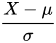

##### Dados antes da normalização

In [ ]:
X_train.sample(5)

##### Visualização da variável Temperatura Média Antes da Normalização

In [ ]:
ax = sns.histplot(data=df, x="temperatura_media_c", kde=True, bins=40, color="green")

ax.set_title("Histograma de Temperatura Média")

##### A Normalização em si

In [ ]:
# Inicializar o Normalizador
scaler = StandardScaler()

In [ ]:
# Treinar o Normalizador
scaler.fit(X_train)

In [ ]:
# Gerar um X_train normalizado
X_train_scaled = scaler.transform(X_train)

In [ ]:
# Criar um dataframe X_train_scaled
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

# Mostrar o X_train normalizado
X_train_scaled.sample(5)

##### Visualização da variável Temperatura Média Após a Normalização

In [ ]:
ax = sns.histplot(data=X_train_scaled, x="temperatura_media_c", kde=True, bins=40, color="green")

ax.set_title("Histograma de Temperatura Média")

### Aprendizado

Treinamento do modelo utilizando Regressão Linear no conjunto de dados de Treino

In [ ]:
# Inicialização da Regressão Linear
reg = LinearRegression()

In [ ]:
# Modelagem
reg.fit(X_train_scaled, y_train)

#### Visualização do Modelo Treinado

##### Função Preditora

In [ ]:
# Variável Independente
interceptador = reg.intercept_

# Coeficientes
coeficientes = reg.coef_

funcao = "predição = {:.2f} + ({:.2f} * temperatura_media_c) + ({:.2f} * temperatura_minima_c) + ({:.2f} * temperatura_maxima_c) + ({:.2f} * precipitacacao_mm) + ({:.2f} * final_de_semana)".format(interceptador, *coeficientes)
print(funcao)

In [ ]:
def predict(X_sample):
    # Variável Independente
    interceptador = reg.intercept_
    
    # Coeficientes
    coeficientes = reg.coef_
    
    return interceptador + (reg.coef_ * X_sample).sum()

In [ ]:
# Index
index = 1

# Predição com nossa função home-made
resultado_predito = predict(X_train_scaled.iloc[index])

# Resultado Real
resultado_real = y_train.iloc[index]

# Diferença
diferenca_entre_predito_e_real = np.abs(resultado_predito - resultado_real)

print("O resultado predito foi {:.2f} e o real é {:.2f}".format(resultado_predito, resultado_real))
print("A diferença absoluta entre os dois é {:.2f} litros".format(diferenca_entre_predito_e_real))

#### Predição do Conjunto de Treinamento

Aqui vamos verificar a performance do modelo treinado no conjunto de Treinamento

In [ ]:
# Predizer o resultado
y_pred = reg.predict(X_train_scaled)

In [ ]:
# Resultado predito
y_pred[0:10]

In [ ]:
# Resultado real
y_train[0:10].values

##### Métrica

Existem várias métricas de análise de erro para regressão.

Para esta apresentação, utilizaremos o Mean Absolute Error:

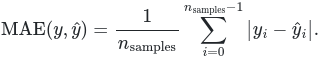




Referência: https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

In [ ]:
## Performance no Conjunto de Treinamento
mean_absolute_error(y_train, y_pred)

##### Visualização do Erro

In [ ]:
series = {
    'y_true': y_train,
    'y_pred': y_pred
}
series_df = pd.DataFrame(series)

def calcula_erro(x):
    return mean_absolute_error([x['y_true']], [x['y_pred']])


series_df['mae'] = series_df.apply(calcula_erro, axis=1)
series_df.head()

In [ ]:
ax = sns.scatterplot(data=series_df, x="y_true", y="y_pred", hue="mae")

ax.set_title("Visualização do Erro no Conjunto de Treinamento")

#### Predição do Conjunto de Teste

Aqui vamos verificar a performance do modelo treinado no conjunto de Teste

In [ ]:
# Aplicar a transformação no conjunto de teste
X_test_scaled = scaler.transform(X_test)

# Criar um dataframe X_test_scaled
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_test_scaled.sample(5)

In [ ]:
# Predizer o resultado
y_pred = reg.predict(X_test_scaled)

In [ ]:
# Resultado predito
y_pred[0:10]

In [ ]:
# Resultado real
y_test[0:10].values

##### Métrica

Existem várias métricas de análise de erro para regressão.

Para esta apresentação, utilizaremos o Mean Absolute Error:

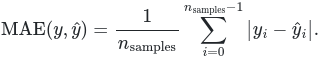




Referência: https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

In [ ]:
## Performance no Conjunto de Treinamento
mean_absolute_error(y_test, y_pred)

##### Visualização do Erro

In [ ]:
series = {
    'y_true': y_test,
    'y_pred': y_pred
}
series_df = pd.DataFrame(series)

def calcula_erro(x):
    return mean_absolute_error([x['y_true']], [x['y_pred']])


series_df['mae'] = series_df.apply(calcula_erro, axis=1)
series_df.head()

In [ ]:
ax = sns.scatterplot(data=series_df, x="y_true", y="y_pred", hue="mae")

ax.set_title("Visualização do Erro no Conjunto de Teste")

#### Teste Aleatório

In [ ]:
def predict_test(index):
    
    X_exemplo = pd.DataFrame(X_test.iloc[index]).T
    
    print("Exemplo:")
    print(X_exemplo.iloc[0])
    
    y_true_exemplo = y_test.iloc[index]
    
    Resultado = namedtuple('Resultado', ['y_true', 'y_pred'])
        
    X_exemplo_scaled = pd.DataFrame(scaler.transform(X_exemplo), columns=X.columns)
    
    y_pred_exemplo = reg.predict(X_exemplo_scaled)[0]
    
    print("\n" + str(Resultado(y_true_exemplo, round(y_pred_exemplo,3))))

In [ ]:
predict_test(3)